# MDTB data set rsFC validation

Taku Ito
2/7/21

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nibabel as nib
import scipy.stats as stats
import nilearn.plotting as plotting

#### Params

In [2]:
datadir = '../../derivatives/postprocessing/'

subIDs=['02','03','04','06','08','09','10','12','14','15','18','20','22','25','27','29','31','17','19','21','24','26','28','30']
# subIDs=['03','04','06','08','09','12','14','15','18','20','22','27','29','31','17','19','21','24','26','28','30']
runs = ['bold9','bold10']

netassignments = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_parcel_network_assignments.txt')
# need to subtract one to make it compatible for python indices
indsort = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_community_order.txt',dtype=int) - 1 
indsort.shape = (len(indsort),1)



In [9]:
def loadRawParcellatedData(sess,run,datadir='/gpfs/loomis/project/n3/Studies/MurrayLab/taku/multiTaskVAE/qunexMultiTaskVAE/sessions/'):
    """ 
    Load in parcellated data for given session and run
    """
    datafile = datadir + sess + '/images/functional/' + run + '_Atlas.LR.Parcels.32k_fs_LR.ptseries.nii'
    data = nib.load(datafile).get_data()
    return data

#### Load in parcellated data and compute correlation matrix

In [13]:
corrmats = []
corrmats_unproc = []
for sub in subIDs:
    
    for run in runs:
        
        try:
            h5f = h5py.File(datadir + sub + '_b2_rsfMRI_qunex_' + run + '.h5','r')
            ts = h5f['residuals'][:]
            h5f.close()
            np.sum(np.mean(ts,axis=1)==0)
            mat = np.corrcoef(ts)
            if np.sum(np.isnan(mat))>0: print(sub, run)
            np.fill_diagonal(mat,0)
            corrmats.append(mat)
        except:
            print('Subject', sub, '| run', run, ' does not exist... skipping')

        try:
            sess = sub + '_b2'
            ts = loadRawParcellatedData(sess,run)
            mat = np.corrcoef(ts.T)
            np.fill_diagonal(mat,0)
            corrmats_unproc.append(mat)
        except:
            print('Subject', sub, '| run', run, ' does not exist... skipping')

        


        
corrmats = np.asarray(corrmats)
corrmats_unproc = np.asarray(corrmats_unproc)

<ipython-input-9-110939f05734>:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = nib.load(datafile).get_data()


Subject 04 | run bold9  does not exist... skipping
Subject 04 | run bold9  does not exist... skipping
Subject 04 | run bold10  does not exist... skipping
Subject 04 | run bold10  does not exist... skipping
Subject 09 | run bold9  does not exist... skipping
Subject 09 | run bold9  does not exist... skipping
Subject 09 | run bold10  does not exist... skipping
Subject 09 | run bold10  does not exist... skipping
Subject 15 | run bold9  does not exist... skipping
Subject 15 | run bold9  does not exist... skipping
Subject 15 | run bold10  does not exist... skipping
Subject 15 | run bold10  does not exist... skipping
Subject 17 | run bold9  does not exist... skipping
Subject 17 | run bold9  does not exist... skipping
Subject 17 | run bold10  does not exist... skipping
Subject 17 | run bold10  does not exist... skipping
Subject 19 | run bold9  does not exist... skipping
Subject 19 | run bold9  does not exist... skipping
Subject 19 | run bold10  does not exist... skipping
Subject 19 | run bold1

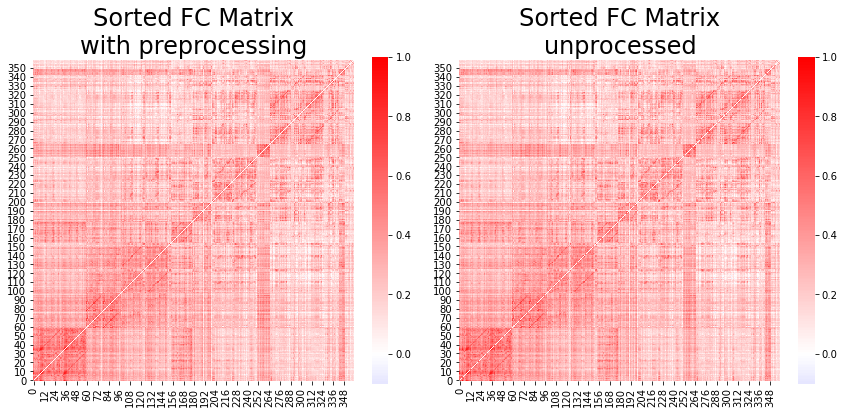

In [18]:

plt.figure(figsize=(14,7))
plt.subplot(121)
fcmat = np.mean(corrmats,axis=0)
fcmat_sorted = fcmat[indsort,indsort.T]
ax = sns.heatmap(fcmat_sorted,square=True,center=0,vmax=1,vmin=-.1,cmap='bwr',cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Sorted FC Matrix\nwith preprocessing',fontsize=24);

plt.subplot(122)
fcmat = np.mean(corrmats_unproc,axis=0)
fcmat_sorted = fcmat[indsort,indsort.T]
ax = sns.heatmap(fcmat_sorted,square=True,center=0,vmax=1,vmin=-.1,cmap='bwr',cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Sorted FC Matrix\nunprocessed',fontsize=24);
# plt.show()
